# Jul 11th, 2022 (Fig-sup: Deg/Ent Percentile)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Fig dir

In [27]:
nn = 512
fig_dir = 'Figs_Supp'
fig_dir = pjoin(fig_base_dir, 'paper2.0', f'n{nn}', fig_dir)
os.makedirs(fig_dir, exist_ok=True)
print(fig_dir)

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 300,
}

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/paper2.0/n512/Figs_Supp

## Prepare (512)

In [3]:
num_k = 7
perc = 20
mice = Mice(nn)
bt_dict, props_bo, props_ca = default_props(mice, num_k, perc)
bt = BootStrap(**props_ca)
pal = prepare_palette()

## Ent/Deg Percentile

In [9]:
d = perc / 100

In [10]:
rv = sp_stats.poisson(d * len(bt.n2l))

x = np.linspace(0, len(bt.n2l), len(bt.n2l) + 1)
y = rv.pmf(x)

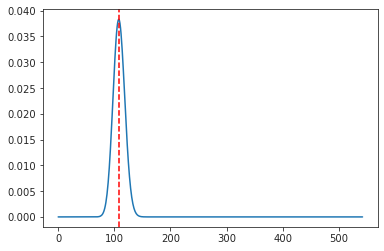

In [11]:
plt.plot(x, y)
plt.axvline(rv.median(), color='r', ls='--');

In [12]:
rv.mean(), rv.median()

(108.4, 108.0)

In [13]:
n = len(bt.n2l)
m = d * (n * (n - 1) / 2)
k_expect = n * d
k_expect

108.4

In [14]:
k_expect / n

0.2

In [15]:
m / (n - 1)

54.2

In [16]:
g = nx.erdos_renyi_graph(n, d)

In [17]:
nx.density(g), d

(0.19975308810389397, 0.2)

In [18]:
g.number_of_edges(), m

(29286, 29322.2)

In [20]:
n * d, (n - 1) * d

(108.4, 108.2)

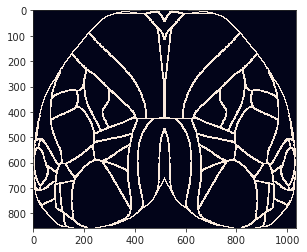

In [21]:
contour = bt.get_contour(0.2, False)
plt.imshow(contour);

### Make the fig

In [22]:
%%time

for mode, o in bt_dict.items():
    o.compute_entropy(
        use_prune=True,
        select_seeds=True if
        mode == BOLD else False,
    )

CPU times: user 3min 41s, sys: 56.5 s, total: 4min 37s
Wall time: 4min 37s


In [30]:
d, len(o.n2l) * d

(0.2, 108.4)

In [ ]:
%%time

fig, axes = create_figure(2, 3, (10, 6), constrained_layout=True, tight_layout=False)

for j, (mode, o) in enumerate(bt_dict.items()):
    axes[0, j].set_title(mode, y=1.05, fontsize=20)
    output = o.ent_deg_percentile(
        n_resamples=int(1e5),
        mu=(0, len(o.n2l) * d),
    )
    for i, item in enumerate(['p_deg', 'p_ent']):
        x = output[item].copy()
        x[x < 75] = np.nan
        ax = axes[i, j]

        ax = ctx2ax(
            x=x,
            ax=ax,
            base=bt,
            vmin=90,
            vmax=100,
            cbar=False,
            contour=contour,
            contour_alpha=0.8,
            contour_cmap='Greys_r',
            cmap='YlOrRd_r',
        )
remove_ticks(axes)
fig.savefig(pjoin(fig_dir, 'ent_deg_percentile.png'), **kws_fig)
plt.show()